In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import sklearn

In [2]:
print (sklearn.__version__)

1.5.1


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
X = np.array(['chien', 'chat','chien', 'lion', 'oiseau'])

In [5]:
encoder = LabelEncoder()
encoder.fit(X)
encoder.transform(X)

array([1, 0, 1, 2, 3])

- Si l'on fait un nouveau encodage alors on change notre règle d'encodage.
- Se qui fait que notre modèle ne marchera pas sur les données du train_set

In [6]:
X_new = np.array(['chien', 'chat','oiseau'])
encoder.fit(X_new)
encoder.transform(X_new) 

array([1, 0, 2])

## Diamonds

In [7]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Utilisation de OrdinalEncoder

In [8]:
# ordre d'encodage des variables
cut_order = ['Fair','Good','Very Good','Premium', 'Ideal']
color_order = ['J','I','H','G','F','E','D']
clarity_order = ['I1', 'SI2', 'SI1','VS2', 'VS1', 'VVS2', 'VVS1', 'IF']


encoder = OrdinalEncoder(
    categories = [cut_order, color_order, clarity_order],
    handle_unknown = "use_encoded_value",                  # donnee une valeur par defaut lorsque une modalité n'est pas reconnue
    unknown_value = -1)

encoder.fit(df[["cut", "color", "clarity"]])
encoder.transform(df[["cut", "color", "clarity"]])

array([[4., 5., 1.],
       [3., 5., 2.],
       [1., 5., 4.],
       ...,
       [2., 6., 2.],
       [3., 2., 1.],
       [4., 6., 1.]])

In [9]:
encoder.transform([["Fair","G","A"]])

c:\Users\dalko\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[ 0.,  3., -1.]])

### Load MPG data

In [23]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### OneHotEncoder
-  Permet d'encoder les variables nominale
- Principaux arguments
  - sparse/sparce_output; retourn une matrice creuse
  - drop: élimine une des colonnes pour éviter le problème de multi-colinéarité
  - handle_unkown: pour rajouter une colonne supplémentaire pours des futures catégories incoonues

In [25]:
encoder = OneHotEncoder(sparse_output = False, drop='first', handle_unknown='ignore')
encoder.fit(df[['origin','name']])
encoder.transform(df[['origin','name']])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

<Axes: >

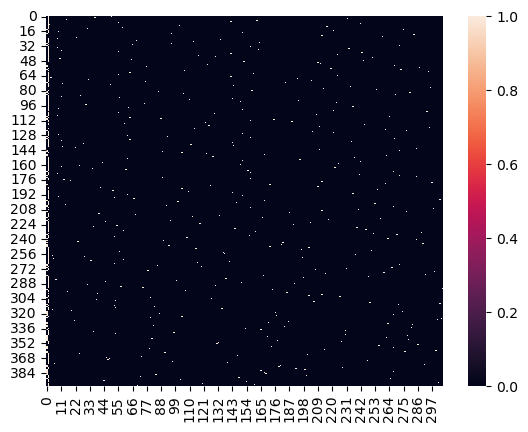

In [12]:
sns.heatmap(encoder.transform(df[['origin','name']]))

### Encoding Target 